In [21]:
from mpl_toolkits.axisartist.axislines import AxesZero
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
sns.set_theme(style="darkgrid")

data = pd.read_csv("data_compilation.csv", sep='\t')
data["height_index"] = data["height"]      
#data["velocity_ratio"] = data["velocity"]/data["speed"]  
#data = data[data["velocity_ratio"] < 1]
data = data.set_index("height_index")  

10 80 7.698525218103246
10 120 7.666165936093739
10 160 7.2363896771470095
18 80 13.220906509407678
18 120 13.331236766299932
18 160 13.179416869215123
22 80 16.44234794433653
22 120 16.530275839965892
22 160 16.486522247843556


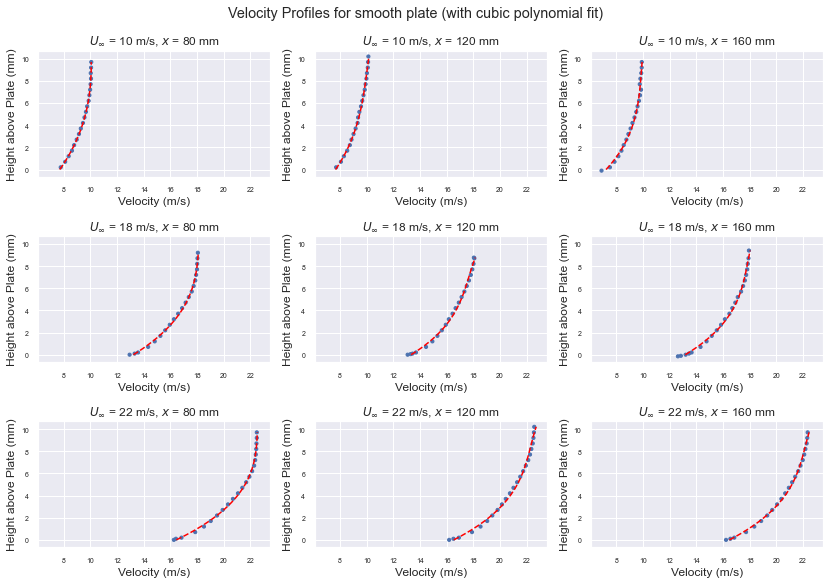

In [22]:
def velocity_data_selector(speed,distance,plate):

    speed_mask = (data["speed"] == speed) 
    plate_mask = (data["plate_type"] == plate)
    distance_mask = (data["distance"] == distance) 

    data_mask = speed_mask & plate_mask & distance_mask
    data_new = data[data_mask]

    x_val = data_new["velocity"].to_numpy()    
    y_val = data_new["height"].to_numpy()    
    y_val = y_val - 1.3
    return x_val, y_val

def velocity_profile_fit(x_val, y_val):  
    
    import numpy as np
    import numpy.polynomial.polynomial as poly

    y_new = np.linspace(0,max(y_val))
    coefs = poly.polyfit(y_val, x_val, 3)
    x_new = poly.polyval(y_new, coefs)
    return x_new, y_new

fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Velocity Profiles for smooth plate (with cubic polynomial fit)')

for scount, speed in enumerate([10,18,22]):
    for dcount, distance in enumerate([80,120,160]):
        x_val, y_val = velocity_data_selector(speed,distance,"smooth")
        x_new, y_new = velocity_profile_fit(x_val, y_val)
        
        print(f"{speed} {distance} {x_new[0]}")
        
        axs[scount, dcount].scatter(x_val,y_val,s=10+x_val*0)
        axs[scount, dcount].plot(x_new,y_new,'--',color='red')

        #axs[scount, dcount].set_ylim(0, max(y_new)+1)
        #axs[scount, dcount].set_xlim(0, max(x_new)+1)

        # for direction in ["xzero", "yzero"]:
            # adds arrows at the ends of each axis
            # axs[scount, dcount].axis[direction].set_axisline_style("-|>")
            # adds X and Y-axis from the origin
            # axs[scount, dcount].axis[direction].set_visible(True)
        # for direction in ["left", "right", "bottom", "top"]:
            # hides borders
            # axs[scount, dcount].axis[direction].set_visible(False)            
        axs[scount, dcount].set_ylabel('Height above Plate (mm)')    
        axs[scount, dcount].set_xlabel('Velocity (m/s)')
        axs[scount, dcount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)
        #ax.vline(speed)
        
        axs[scount, dcount].grid(True)
        title_string = "$U_{\infty}$ = %s m/s, $x$ = %s mm"
        axs[scount, dcount].set_title(title_string % (speed, distance))
        

fig.tight_layout()
#fig.show()
fig.savefig('velocity_smooth.png', bbox_inches='tight',  dpi=150)

10 80 6.654916188445163
10 120 6.249808236010825
10 160 6.158794204680069
18 80 10.577552302294475
18 120 10.45560292013036
18 160 10.450061731217097
22 80 11.520454317728827
22 120 12.14925554727897
22 160 12.199563571030168


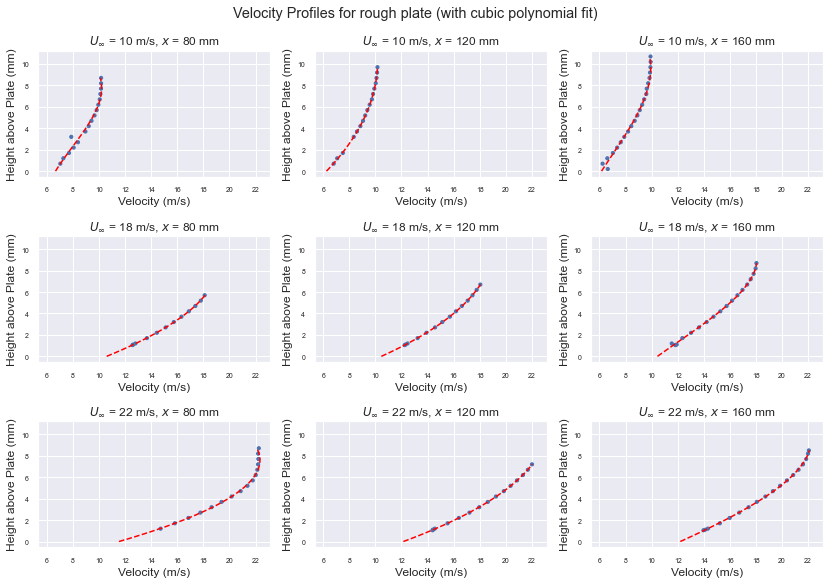

In [23]:
def velocity_data_selector(speed,distance,plate):

    speed_mask = (data["speed"] == speed) 
    plate_mask = (data["plate_type"] == plate)
    distance_mask = (data["distance"] == distance) 

    data_mask = speed_mask & plate_mask & distance_mask
    data_new = data[data_mask]

    x_val = data_new["velocity"].to_numpy()    
    y_val = data_new["height"].to_numpy()    
    y_val = y_val - 1.3
    return x_val, y_val

def velocity_profile_fit(x_val, y_val):  
    
    import numpy as np
    import numpy.polynomial.polynomial as poly

    y_new = np.linspace(0,max(y_val))
    coefs = poly.polyfit(y_val, x_val, 3)
    x_new = poly.polyval(y_new, coefs)
    return x_new, y_new

fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Velocity Profiles for rough plate (with cubic polynomial fit)')

for scount, speed in enumerate([10,18,22]):
    for dcount, distance in enumerate([80,120,160]):
        x_val, y_val = velocity_data_selector(speed,distance,"rough")
        x_new, y_new = velocity_profile_fit(x_val, y_val)
        
        print(f"{speed} {distance} {x_new[0]}")
        
        axs[scount, dcount].scatter(x_val,y_val,s=10+x_val*0)
        axs[scount, dcount].plot(x_new,y_new,'--',color='red')

        #axs[scount, dcount].set_ylim(0, max(y_new)+1)
        #axs[scount, dcount].set_xlim(0, max(x_new)+1)

        # for direction in ["xzero", "yzero"]:
            # adds arrows at the ends of each axis
            # axs[scount, dcount].axis[direction].set_axisline_style("-|>")
            # adds X and Y-axis from the origin
            # axs[scount, dcount].axis[direction].set_visible(True)
        # for direction in ["left", "right", "bottom", "top"]:
            # hides borders
            # axs[scount, dcount].axis[direction].set_visible(False)            
        axs[scount, dcount].set_ylabel('Height above Plate (mm)')    
        axs[scount, dcount].set_xlabel('Velocity (m/s)')
        axs[scount, dcount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)
        #ax.vline(speed)
        
        axs[scount, dcount].grid(True)
        title_string = "$U_{\infty}$ = %s m/s, $x$ = %s mm"
        axs[scount, dcount].set_title(title_string % (speed, distance))
        

fig.tight_layout()
#fig.show()
fig.savefig('velocity_rough.png', bbox_inches='tight', dpi=150)

10 80 0.7698525218103252
10 120 0.766616593609374
10 160 0.7236389677147005
18 80 0.7344948060782049
18 120 0.7406242647944404
18 160 0.732189826067506
22 80 0.7473794520152973
22 120 0.7513761745439046
22 160 0.749387374901981


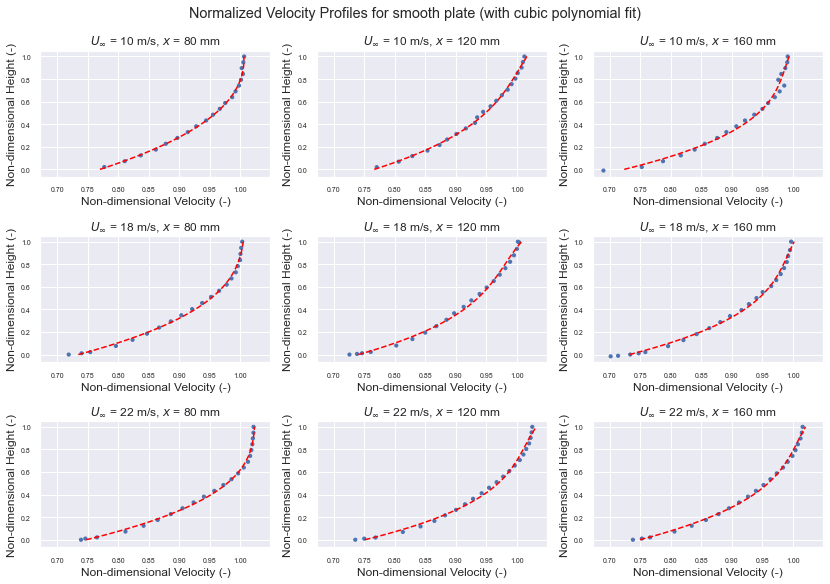

In [24]:
def velocity_data_selector(speed,distance,plate):

    speed_mask = (data["speed"] == speed) 
    plate_mask = (data["plate_type"] == plate)
    distance_mask = (data["distance"] == distance) 

    data_mask = speed_mask & plate_mask & distance_mask
    data_new = data[data_mask]

    x_val = data_new["velocity"].to_numpy()    
    y_val = data_new["height"].to_numpy()    
    y_val = y_val - 1.3
    return x_val, y_val

def velocity_profile_fit(x_val, y_val):  
    
    import numpy as np
    import numpy.polynomial.polynomial as poly

    y_new = np.linspace(0,max(y_val))
    coefs = poly.polyfit(y_val, x_val, 3)
    x_new = poly.polyval(y_new, coefs)
    return x_new, y_new

fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Normalized Velocity Profiles for smooth plate (with cubic polynomial fit)')

for scount, speed in enumerate([10,18,22]):
    for dcount, distance in enumerate([80,120,160]):
        x_val, y_val = velocity_data_selector(speed,distance,"smooth")
        x_val = x_val/speed
        y_val = y_val/max(y_val)
        x_new, y_new = velocity_profile_fit(x_val, y_val)
        
        print(f"{speed} {distance} {x_new[0]}")
        
        axs[scount, dcount].scatter(x_val,y_val,s=10+x_val*0)
        axs[scount, dcount].plot(x_new,y_new,'--',color='red')

        #axs[scount, dcount].set_ylim(0, max(y_new)+1)
        #axs[scount, dcount].set_xlim(0, max(x_new)+1)

        # for direction in ["xzero", "yzero"]:
            # adds arrows at the ends of each axis
            # axs[scount, dcount].axis[direction].set_axisline_style("-|>")
            # adds X and Y-axis from the origin
            # axs[scount, dcount].axis[direction].set_visible(True)
        # for direction in ["left", "right", "bottom", "top"]:
            # hides borders
            # axs[scount, dcount].axis[direction].set_visible(False)            
        axs[scount, dcount].set_ylabel('Non-dimensional Height (-)')    
        axs[scount, dcount].set_xlabel('Non-dimensional Velocity (-)')
        axs[scount, dcount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)
        #ax.vline(speed)
        
        axs[scount, dcount].grid(True)
        title_string = "$U_{\infty}$ = %s m/s, $x$ = %s mm"
        axs[scount, dcount].set_title(title_string % (speed, distance))
        

fig.tight_layout()
#fig.show()
fig.savefig('normalized_smooth.png', bbox_inches='tight',  dpi=150)

10 80 0.6654916188445161
10 120 0.6249808236010819
10 160 0.6158794204680067
18 80 0.587641794571915
18 120 0.5808668288961317
18 160 0.5805589850676169
22 80 0.5236570144422186
22 120 0.5522388885126797
22 160 0.5545256168650075


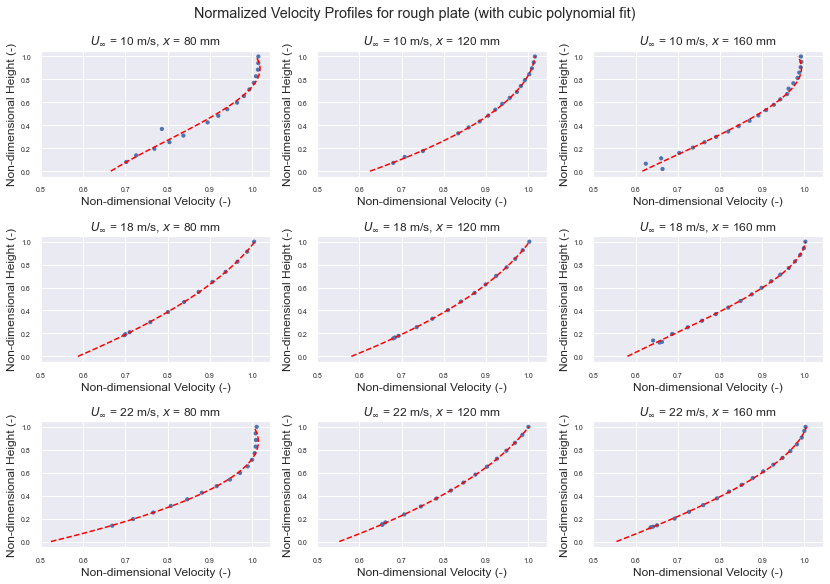

In [25]:
def velocity_data_selector(speed,distance,plate):

    speed_mask = (data["speed"] == speed) 
    plate_mask = (data["plate_type"] == plate)
    distance_mask = (data["distance"] == distance) 

    data_mask = speed_mask & plate_mask & distance_mask
    data_new = data[data_mask]

    x_val = data_new["velocity"].to_numpy()    
    y_val = data_new["height"].to_numpy()    
    y_val = y_val - 1.3
    return x_val, y_val

def velocity_profile_fit(x_val, y_val):  
    
    import numpy as np
    import numpy.polynomial.polynomial as poly

    y_new = np.linspace(0,max(y_val))
    coefs = poly.polyfit(y_val, x_val, 3)
    x_new = poly.polyval(y_new, coefs)
    return x_new, y_new

fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Normalized Velocity Profiles for rough plate (with cubic polynomial fit)')

for scount, speed in enumerate([10,18,22]):
    for dcount, distance in enumerate([80,120,160]):
        x_val, y_val = velocity_data_selector(speed,distance,"rough")
        x_val = x_val/speed
        y_val = y_val/max(y_val)
        x_new, y_new = velocity_profile_fit(x_val, y_val)
        
        print(f"{speed} {distance} {x_new[0]}")
        
        axs[scount, dcount].scatter(x_val,y_val,s=10+x_val*0)
        axs[scount, dcount].plot(x_new,y_new,'--',color='red')

        #axs[scount, dcount].set_ylim(0, max(y_new)+1)
        #axs[scount, dcount].set_xlim(0, max(x_new)+1)

        # for direction in ["xzero", "yzero"]:
            # adds arrows at the ends of each axis
            # axs[scount, dcount].axis[direction].set_axisline_style("-|>")
            # adds X and Y-axis from the origin
            # axs[scount, dcount].axis[direction].set_visible(True)
        # for direction in ["left", "right", "bottom", "top"]:
            # hides borders
            # axs[scount, dcount].axis[direction].set_visible(False)            
        axs[scount, dcount].set_ylabel('Non-dimensional Height (-)')    
        axs[scount, dcount].set_xlabel('Non-dimensional Velocity (-)')
        axs[scount, dcount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)
        #ax.vline(speed)
        
        axs[scount, dcount].grid(True)
        title_string = "$U_{\infty}$ = %s m/s, $x$ = %s mm"
        axs[scount, dcount].set_title(title_string % (speed, distance))
        

fig.tight_layout()
#fig.show()
fig.savefig('normalized_rough.png', bbox_inches='tight',  dpi=150)